<div class="alert alert-info">
<h1> <b>Key Results</b> </h1>
<br>
Takes in results of Monte Carlo simulations and generates key results used in the paper. <br>
Quotes are provided to give context for how results are used in the final publication
</div>

<div class="alert alert-info">
<b>Table of Contents</b> <br><br>
1. <a href="#choropleths">Data for Choropleths</a> <br>
2. <a href="#overall">Overall Access Numbers</a> <br>
3. <a href="#cycling_walking">Cycling vs Walking</a> <br>
4. <a href="#piped">Relationship between piped access and GCIL water access</a>
</div>

In [2]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import weightedstats as ws
from tabulate import tabulate
from scipy.stats import spearmanr

In [3]:
# Read country-level results from Monte Carlo sims
country_medians = pd.read_csv("../results/country_median_results.csv")
country_means = pd.read_csv("../results/country_mean_results.csv")
country_5th_percentiles = pd.read_csv("../results/country_5th_percentile_results.csv")
country_95th_percentiles = pd.read_csv("../results/country_95th_percentile_results.csv")

# Read district-level results from Monte Carlo sims
district_medians = pd.read_csv("../results/districts_median_results.csv")
district_means = pd.read_csv("../results/districts_mean_results.csv")
district_5th_percentiles = pd.read_csv("../results/districts_5th_percentile_results.csv")
district_95th_percentiles = pd.read_csv("../results/districts_95th_percentile_results.csv")


In [4]:
# Constants to save new results (will overwrite existing results)
SAVE_CSVS = False
SAVE_FIGURES = False

<div class="alert alert-info">
<h3> <b>1. Data for Choropleths </b> </h3>
<a id="choropleths"></a>
Simplified data to export to Datawrapper for making maps of water access loss in GCIL.
</div>

In [5]:
country_medians_simple = country_medians[["ISOCODE", "Entity", "percent_without_water"]]
venezuela_medians = district_medians[district_medians["Entity"] == "Venezuela"]
venezuela_medians_simple = venezuela_medians[["shapeName", "percent_without_water"]]

if SAVE_CSVS == True:
    country_medians_simple.to_csv("../results/country_medians_simple.csv", index=False)
    country_medians_simple.to_csv("../results/venezulea_means_simple.csv", index=False)

<div class="alert alert-info">
<h3> <b>2. Overall Access Numbers </b> </h3>
<a id="overall"></a>
Overall access (walking and cycling) for the world, and select countries
</div>

<div class="alert alert-success"> Quote from paper: "Globally, the median model results indicate that <b>29% (90% CI 21–41%)</b> of the world population would be unable to access sufficient water in the aftermath of a GCIL scenario (Figure 3)."

In [6]:
# Overall global population without water
global_median_percentage_without_water = country_medians["country_pop_without_water"].sum() / country_medians["country_pop_raw"].sum()
global_5th_percentage_without_water = country_5th_percentiles["country_pop_without_water"].sum() / country_5th_percentiles["country_pop_raw"].sum()
global_95th_percentage_without_water = country_95th_percentiles["country_pop_without_water"].sum() / country_95th_percentiles["country_pop_raw"].sum()

global_median_percentage_with_water = country_medians["country_pop_with_water"].sum() / country_medians["country_pop_raw"].sum()

# Print overall results
print(f"Global median percentage without water: {global_median_percentage_without_water}")
print(f"Global 5th percentile percentage without water: {global_5th_percentage_without_water}")
print(f"Global 95th percentile percentage without water: {global_95th_percentage_without_water}")

# sense check with percentage with water
print("")
print(f"Global median percentage with water: {global_median_percentage_with_water}")
print("")

Global median percentage without water: 0.2913699818564235
Global 5th percentile percentage without water: 0.21471390222776646
Global 95th percentile percentage without water: 0.4063566485492813

Global median percentage with water: 0.7084980986429009



<div class="alert alert-success"> Quote from paper: "Of the <b>71%</b> with water access, <b>56% (90% CI 48–60%)</b> usually rely on piped water and would therefore have to walk or cycle to a freshwater source, while the remainder would, in theory, continue to use their non-piped sources."

In [7]:
# Piped populations without water
proportion_with_water_piped_median = country_medians["population_piped_with_access"].sum() / country_medians["country_pop_with_water"].sum()
proportion_with_water_piped_5th = country_5th_percentiles["population_piped_with_access"].sum() / country_5th_percentiles["country_pop_with_water"].sum()
proportion_with_water_piped_95th = country_95th_percentiles["population_piped_with_access"].sum() / country_95th_percentiles["country_pop_with_water"].sum()

# Print piped results
# sense check with percentage with water
print(f"Global median percentage with water: {global_median_percentage_with_water}")
print(f"Median proportion with water access who are piped: {proportion_with_water_piped_median}")
print(f"5th percentile proportion with water access who are piped: {proportion_with_water_piped_5th}")
print(f"95th percentile proportion with water access who are piped: {proportion_with_water_piped_95th}")

Global median percentage with water: 0.7084980986429009
Median proportion with water access who are piped: 0.5625725070062731
5th percentile proportion with water access who are piped: 0.477825480021634
95th percentile proportion with water access who are piped: 0.6052793761316559


<div class="alert alert-success"> Quote from paper: "The regional percentage of people without water access was highest in Africa at <b>44.1% (90% CI 39.6–49.9%)</b>, followed by the Americas at <b>41.4% (90% CI 28.9–58.8)</b>, Oceania at <b>32.4% (90% 26.3–44.1)</b>, Europe at <b>25.9% (90% CI 14.1–47.2)</b>, and Asia at <b>22.5% (90% CI 15.7–32.9)</b>."

In [8]:
# Define a function to calculate percent without water
def calculate_percent(df, group):
    data = df.groupby(group).sum()
    percent_without_water = (data['country_pop_without_water'] / data['country_pop_raw']) * 100
    return percent_without_water

# Calculate percent without water for each DataFrame
region_percent_without_water_median = calculate_percent(country_medians, "region")
region_percent_without_water_5th = calculate_percent(country_5th_percentiles, "region")
region_percent_without_water_95th = calculate_percent(country_95th_percentiles, "region")

# Merge results into a single DataFrame
region_percent_without_water = pd.DataFrame({
    'median': region_percent_without_water_median,
    '5th_percentile': region_percent_without_water_5th,
    '95th_percentile': region_percent_without_water_95th
})

# Repeat for subregions
subregion_percent_without_water_median = calculate_percent(country_medians, "subregion")
subregion_percent_without_water_5th = calculate_percent(country_medians, "subregion")
subregion_percent_without_water_95th = calculate_percent(country_medians, "subregion")

# Merge results into a single DataFrame
subregion_percent_without_water = pd.DataFrame({
    'median': subregion_percent_without_water_median,
    '5th_percentile': subregion_percent_without_water_5th,
    '95th_percentile': subregion_percent_without_water_95th
})

# Define formatting function
def format_results(row):
    median = round(row['median'], 1)
    p5th = round(row['5th_percentile'], 1)
    p95th = round(row['95th_percentile'], 1)
    return f"{median} ({p5th}–{p95th})"

# Apply formatting function to each row
region_percent_without_water['formatted_results'] = region_percent_without_water.apply(format_results, axis=1)
subregion_percent_without_water['formatted_results'] = subregion_percent_without_water.apply(format_results, axis=1)

# Print results
print(region_percent_without_water.sort_values(by='median', ascending=False))
print(subregion_percent_without_water.sort_values(by='median', ascending=False))

region_percent_without_water.to_csv("../results/region_results.csv", index=True)
subregion_percent_without_water.to_csv("../results/subregion_results.csv", index=True)

             median  5th_percentile  95th_percentile formatted_results
region                                                                
Africa    44.103722       39.633869        49.886023  44.1 (39.6–49.9)
Americas  41.378269       28.851321        58.760775  41.4 (28.9–58.8)
Oceania   32.371030       26.312554        44.102250  32.4 (26.3–44.1)
Europe    25.933368       14.055380        47.165699  25.9 (14.1–47.2)
Asia      22.534575       15.661886        32.853936  22.5 (15.7–32.9)
                              median  5th_percentile  95th_percentile  \
subregion                                                               
Polynesia                  59.524553       59.524553        59.524553   
Middle Africa              57.354188       57.354188        57.354188   
Western Asia               52.707629       52.707629        52.707629   
Melanesia                  51.334201       51.334201        51.334201   
Northern Africa            50.367707       50.367707        50.36

<div class="alert alert-success">Quote from paper: All five of the worst ranked countries were in the Arabian Peninsula, led by the United Arab Emirates (UAE) with 99.97%

In [9]:
# Make a single table with the 10 countries with the highest and lowest percentage of people without access to water
top10 = country_medians_simple.nlargest(10, "percent_without_water")
bottom10 = country_medians_simple.nsmallest(10, "percent_without_water")
top_bottom = pd.concat([top10, bottom10])

if SAVE_CSVS == True:
    top_bottom.to_csv("../results/top_bottom_10_countries.csv", index=False)

<div class="alert alert-info">
<h3> <b>3. Cycling vs walking results </b> </h3>
<a id="cycling_walking"></a>
</div>

<div class="alert alert-success">Quote from paper: The maximum euclidean distance people could walk one-way to water varied between <b>3.6–4.0 km</b> in the model, approximately equal to travelling 4.8–5.4 km on roads if using a conversion factor of 1.345 (Gonçalves et al., 2014). For cycling, the equivalent euclidean distances were <b>0–17.7 km</b>, equivalent to approximately 0–23.8 km on roads. <br><br> NB: These are currently given as full ranges rather than 90% CIs, as the data is not population-weighted.<br> NB: The minimum cycling distance is negative, but expressed as zero in the paper. This is due to the parameters in some regions having very poor cycling conditions (e.g., very steep, no roads), leading to the model requiring more energy than available to move forwards.


In [10]:
min_walking = country_medians["min_max_distance_walking"].min()
max_walking = country_medians["max_max_distance_walking"].max()
min_cycling = country_medians["min_max_distance_cycling"].min()
max_cycling = country_medians["max_max_distance_cycling"].max()
print(f"Minimum walking distance: {min_walking}")
print(f"Maximum walking distance: {max_walking}")
print(f"Minimum cycling distance: {min_cycling}")
print(f"Maximum cycling distance: {max_cycling}")

Minimum walking distance: 3.3599322753440046
Maximum walking distance: 4.032643951948407
Minimum cycling distance: -3.7486676361843023
Maximum cycling distance: 17.729752085551528


<div class="alert alert-success">Quote from paper: "Bicycles increased access in the simulations, allowing <b>32% (90% CI 23–57%)</b> of the piped water population to cycle to water instead of walking. While some of these people would be close enough to walk if needed, <b>17%</b> of the piped water population, or <b>7%</b> of the total world population, would not."

In [11]:
# For walking vs cycling breakdown, we are using the mean results instead of median as this will lead to more intuitive comparisons.
# If we use the medians, the sum of the individual walking and cycling access may be very different to the the sum of the total access
# First, let's look at piped only
country_means["country_pop_piped"] = country_means["country_pop_raw"] * country_means["Nat Piped"] / 100
global_mean_percentage_piped_with_access = country_means["population_piped_with_access"].sum() / country_means["country_pop_piped"].sum()
global_mean_piped_percentage_with_cycling_access = country_means["population_piped_with_cycling_access"].sum() / country_means["country_pop_piped"].sum()
global_mean_piped_percentage_with_walking_access = country_means["population_piped_with_walking_access"].sum() / country_means["country_pop_piped"].sum()
global_mean_piped_percentage_with_only_cycling_access = (country_means["population_piped_with_access"].sum() - country_means["population_piped_with_walking_access"].sum()) / country_means["country_pop_piped"].sum()

print(f"Relative to global piped population: mean percentage piped with access: {global_mean_percentage_piped_with_access}")
print(f"Relative to global piped population: mean percentage piped with cycling access: {global_mean_piped_percentage_with_cycling_access}")
print(f"Relative to global piped population: mean percentage piped with walking access: {global_mean_piped_percentage_with_walking_access}")
print(f"Relative to global piped population: mean percentage piped with only cycling access: {global_mean_piped_percentage_with_only_cycling_access}")

Relative to global piped population: mean percentage piped with access: 0.5981595974341911
Relative to global piped population: mean percentage piped with cycling access: 0.27590043107738255
Relative to global piped population: mean percentage piped with walking access: 0.5018188328577694
Relative to global piped population: mean percentage piped with only cycling access: 0.09634076457642178


In [12]:
# Median, 5th, and 95th percentile results for piped water population
country_medians["country_pop_piped"] = country_medians["country_pop_raw"] * country_medians["Nat Piped"] / 100
country_5th_percentiles["country_pop_piped"] = country_5th_percentiles["country_pop_raw"] * country_5th_percentiles["Nat Piped"] / 100
country_95th_percentiles["country_pop_piped"] = country_95th_percentiles["country_pop_raw"] * country_95th_percentiles["Nat Piped"] / 100

assert (country_medians["country_pop_piped"] == country_5th_percentiles["country_pop_piped"]).all()
assert (country_medians["country_pop_piped"] == country_95th_percentiles["country_pop_piped"]).all()

global_median_piped_percentage_with_cycling_access = country_medians["population_piped_with_cycling_access"].sum() / country_medians["country_pop_piped"].sum()
global_5th_piped_percentage_with_cycling_access = country_5th_percentiles["population_piped_with_cycling_access"].sum() / country_5th_percentiles["country_pop_piped"].sum()
global_95th_piped_percentage_with_cycling_access = country_95th_percentiles["population_piped_with_cycling_access"].sum() / country_95th_percentiles["country_pop_piped"].sum()

print(f"Relative to global piped population: median percentage piped with cycling access: {global_median_piped_percentage_with_cycling_access}")
print(f"Relative to global piped population: 5th percentile percentage piped with cycling access: {global_5th_piped_percentage_with_cycling_access}")
print(f"Relative to global piped population: 95th percentile percentage piped with cycling access: {global_95th_piped_percentage_with_cycling_access}")


Relative to global piped population: median percentage piped with cycling access: 0.1975692009196145
Relative to global piped population: 5th percentile percentage piped with cycling access: 0.09878604578863677
Relative to global piped population: 95th percentile percentage piped with cycling access: 0.4136662002322547


In [13]:
# Now looking at proportions of the global population (piped and non-piped)
# Note that this (country_pop_raw) is also including non-piped population who do not walk/cycle to collect water
global_mean_percentage_with_access = country_means["population_piped_with_access"].sum() / country_means["country_pop_raw"].sum()
global_mean_percentage_with_cycling_access = country_means["population_piped_with_cycling_access"].sum() / country_means["country_pop_raw"].sum()
global_mean_percentage_with_walking_access = country_means["population_piped_with_walking_access"].sum() / country_means["country_pop_raw"].sum()
global_mean_percentage_with_only_cycling_access = (country_means["population_piped_with_access"].sum() - country_means["population_piped_with_walking_access"].sum()) / country_means["country_pop_raw"].sum()

print(f"Global mean percentage with access: {global_mean_percentage_with_access}")
print(f"Global mean percentage with cycling access: {global_mean_percentage_with_cycling_access}")
print(f"Global mean percentage with walking access: {global_mean_percentage_with_walking_access}")
print(f"Global mean percentage with only cycling access: {global_mean_percentage_with_only_cycling_access}")

Global mean percentage with access: 0.38998753515565754
Global mean percentage with cycling access: 0.1798813051329325
Global mean percentage with walking access: 0.3271753735296731
Global mean percentage with only cycling access: 0.06281216162598446


#### Most important countries for bicycles

<div class="alert alert-success">Quote from paper: "Cycling provided access for 47% of Burkina Faso’s piped water population in the model. However, the actual water access gained is small for the countries listed (0.03–5% of their populations), due to few people being able to access water at all in UAE, Hong Kong, and Kuwait, and very few people having piped water infrastructure in Burkina Faso. In contrast, cycling enabled 26% of people in Luxembourg to fulfil essential water needs, along with 24% in Germany, 24% in Belgium, 23% in Finland, and 22% in Argentina."

In [14]:
# TODO Change to means so walking/cycling split makes sense?
# Calculate top 10 countries by lowest value for global_mean_piped_percentage_with_walking_access
country_medians["percentage_piped_with_walking_access"] = country_medians["population_piped_with_walking_access"] / country_medians["population_piped_with_access"] * 100
country_medians["percentage_piped_with_cycling_access"] = country_medians["population_piped_with_cycling_access"] / country_medians["population_piped_with_access"] * 100
country_medians["percentage_piped_of_total_access"] = country_medians["population_piped_with_access"] / country_medians["country_pop_with_water"] * 100
country_medians["population_piped_with_only_cycling_access"] = country_medians["population_piped_with_access"] - country_medians["population_piped_with_walking_access"]
country_medians["percentage_piped_with_only_cycling_access"] = country_medians["population_piped_with_only_cycling_access"] / country_medians["population_piped_with_access"] * 100
country_medians["percentage_total_with_only_cycling_access"] = country_medians["population_piped_with_only_cycling_access"] / country_medians["country_pop_raw"] * 100

top_piped_cycling_access = country_medians.nlargest(30, "percentage_piped_with_only_cycling_access")
print(tabulate(top_piped_cycling_access[['Entity', "percentage_piped_with_only_cycling_access", "percentage_total_with_only_cycling_access", 'percentage_piped_with_walking_access', 'percentage_piped_with_cycling_access', "percent_with_water"]], headers='keys', tablefmt='psql'))



+-----+----------------------+---------------------------------------------+---------------------------------------------+----------------------------------------+----------------------------------------+----------------------+
|     | Entity               |   percentage_piped_with_only_cycling_access |   percentage_total_with_only_cycling_access |   percentage_piped_with_walking_access |   percentage_piped_with_cycling_access |   percent_with_water |
|-----+----------------------+---------------------------------------------+---------------------------------------------+----------------------------------------+----------------------------------------+----------------------|
|   4 | United Arab Emirates |                                    100      |                                  0.0313029  |                                 0      |                              100       |            0.0313029 |
|  71 | Hong Kong            |                                    100      |            

In [15]:
# OR rank by total population that gain access by cycling
top_total_cycling_access = country_medians.nlargest(30, "percentage_total_with_only_cycling_access")
print(tabulate(top_total_cycling_access[['Entity', "percentage_total_with_only_cycling_access", "percentage_piped_with_only_cycling_access", 'percentage_piped_with_walking_access', 'percentage_piped_with_cycling_access', "percent_with_water"]], headers='keys', tablefmt='psql'))

+-----+----------------+---------------------------------------------+---------------------------------------------+----------------------------------------+----------------------------------------+----------------------+
|     | Entity         |   percentage_total_with_only_cycling_access |   percentage_piped_with_only_cycling_access |   percentage_piped_with_walking_access |   percentage_piped_with_cycling_access |   percent_with_water |
|-----+----------------+---------------------------------------------+---------------------------------------------+----------------------------------------+----------------------------------------+----------------------|
| 103 | Luxembourg     |                                     25.699  |                                     37.4714 |                                62.5286 |                                4.68659 |              69.3351 |
|  39 | Germany        |                                     23.6476 |                                     29.47

<div class="alert alert-info">
<h3> <b>4. Relationship between piped water access and GCIL water access </b> </h3>
<a id="piped"></a>
</div>


<div class="alert alert-success">Quote from paper: "Despite reliance on piped infrastructure being a risk factor for losing water access in GCIL at the individual level, this does not seem to inherently imply the same at the national level (Figure X). The median results had a Spearman correlation coefficient of 0.42 (p = X.XXX), indicating a moderate positive correlation."

In [16]:
# Piped water access by country
# create bubble chart from df_countries comprising: access to water, piped water, and using population as the size of the bubble
# create a new column for the size of the bubble

# create bubble size column with square root transformation for improved visuals
country_medians["bubble_size"] = country_medians["country_pop_raw"] **0.5

px.scatter(
    country_medians, 
    y="percent_without_water", 
    x="Nat Piped", 
    size="bubble_size", 
    color="region", 
    hover_name="Entity", 
    # title="Access to Water vs. Piped Water vs. Population",
).update_layout(
    yaxis_title="Country population without access to water (%)",
    xaxis_title="Country piped water access (%)",
    legend_title="Region",
    width=1200,
    height=800,
    font=dict(size=25),
    # xaxis_tickangle=-45,
    # yaxis=dict(tickfont=dict(size=2)),
    # title=dict(font=dict(size=20)),
)

In [17]:
# Check for correlation using median, 5th, and 95th percentiles
correlation_scipy = spearmanr(country_medians["percent_without_water"], country_medians["Nat Piped"])
correlation_5th_scipy = spearmanr(country_5th_percentiles["percent_without_water"], country_5th_percentiles["Nat Piped"])
correlation_95th_scipy = spearmanr(country_95th_percentiles["percent_without_water"], country_95th_percentiles["Nat Piped"])
print(f"Spearman correlation between percent_without_water and Nat Piped (median) using scipy: {correlation_scipy}")
print(f"Spearman correlation between percent_without_water and Nat Piped (5th) using scipy: {correlation_5th_scipy}")
print(f"Spearman correlation between percent_without_water and Nat Piped (95th) using scipy: {correlation_95th_scipy}")

Spearman correlation between percent_without_water and Nat Piped (median) using scipy: SignificanceResult(statistic=0.032926907717905345, pvalue=0.652862490025901)
Spearman correlation between percent_without_water and Nat Piped (5th) using scipy: SignificanceResult(statistic=-0.17356985101387062, pvalue=0.016916425367349656)
Spearman correlation between percent_without_water and Nat Piped (95th) using scipy: SignificanceResult(statistic=0.39243541938494436, pvalue=2.337271256339623e-08)


<div class="alert alert-warning">That seems perplexing! It may be more robust to check all correlations and create confidence intervals from them. Let's check all correlations for robustness:


In [18]:
#load pickeld simulation results
simulation_results = pd.read_pickle("../results/countries_simulation_results.pkl")

# Calculate Spearman correlation for each DataFrame in the list
correlations = [spearmanr(df["percent_without_water"], df["Nat Piped"]) for df in simulation_results]

# Extract correlation statistics and p-values
statistics = [corr.correlation for corr in correlations]
pvalues = [corr.pvalue for corr in correlations]

# Calculate median, 5th and 95th percentiles for statistics
statistics_median = np.median(statistics)
statistics_5th = np.percentile(statistics, 5)
statistics_95th = np.percentile(statistics, 95)

# Calculate median, 5th and 95th percentiles for pvalues
pvalues_median = np.median(pvalues)
pvalues_5th = np.percentile(pvalues, 5)
pvalues_95th = np.percentile(pvalues, 95)

print("Statistics:")
print("Median: ", statistics_median)
print("5th percentile: ", statistics_5th)
print("95th percentile: ", statistics_95th)

print("\nP-values:")
print("Median: ", pvalues_median)
print("5th percentile: ", pvalues_5th)
print("95th percentile: ", pvalues_95th)

Statistics:
Median:  0.03474282837608743
5th percentile:  -0.16471436762313488
95th percentile:  0.3826995383476779

P-values:
Median:  0.1388833972849039
5th percentile:  5.589084469434598e-08
95th percentile:  0.8934326026330528


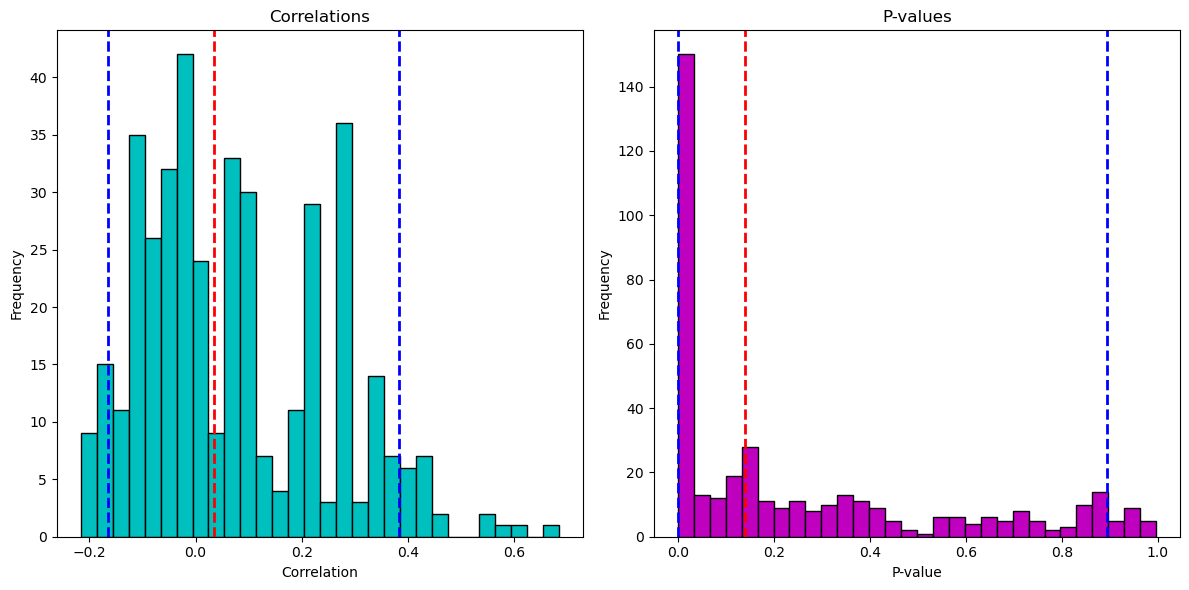

In [19]:
# Create a new figure
plt.figure(figsize=(12, 6))

# Create a subplot for correlations
plt.subplot(1, 2, 1)
plt.hist(statistics, bins=30, color='c', edgecolor='black')
plt.axvline(statistics_median, color='r', linestyle='dashed', linewidth=2)
plt.axvline(statistics_5th, color='b', linestyle='dashed', linewidth=2)
plt.axvline(statistics_95th, color='b', linestyle='dashed', linewidth=2)
plt.title('Correlations')
plt.xlabel('Correlation')
plt.ylabel('Frequency')

# Create a subplot for p-values
plt.subplot(1, 2, 2)
plt.hist(pvalues, bins=30, color='m', edgecolor='black')
plt.axvline(pvalues_median, color='r', linestyle='dashed', linewidth=2)
plt.axvline(pvalues_5th, color='b', linestyle='dashed', linewidth=2)
plt.axvline(pvalues_95th, color='b', linestyle='dashed', linewidth=2)
plt.title('P-values')
plt.xlabel('P-value')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()